Linear Regression RMSE: 0.476
MLP Regression RMSE: 0.188


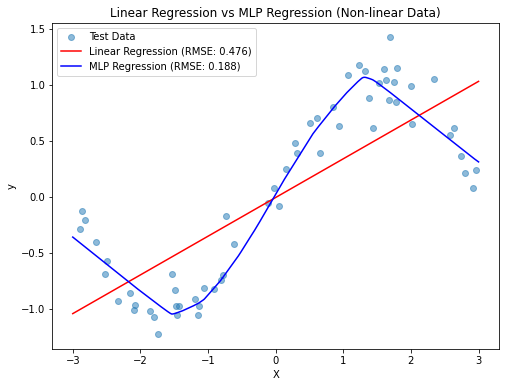

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic non-linear regression data
np.random.seed(42)
X = np.linspace(-3, 3, 300).reshape(-1, 1)
y = np.sin(X).squeeze() + np.random.normal(0, 0.2, X.shape[0])  # Non-linear relation with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_full = lin_reg.predict(X)        # Predictions for plotting
y_pred_lin_test = lin_reg.predict(X_test)     # Predictions for computing RMSE

# MLP Regression Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', 
                       solver='adam', max_iter=5000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
y_pred_mlp_full = mlp_reg.predict(scaler.transform(X))  # Predictions for plotting
y_pred_mlp_test = mlp_reg.predict(X_test_scaled)          # Predictions for computing RMSE

# Compute RMSE for each model
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin_test))
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp_test))

print("Linear Regression RMSE: {:.3f}".format(rmse_lin))
print("MLP Regression RMSE: {:.3f}".format(rmse_mlp))

# Plot the results, adding the RMSE values to the legend labels
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X, y_pred_lin_full, label=f'Linear Regression (RMSE: {rmse_lin:.3f})', color='red')
plt.plot(X, y_pred_mlp_full, label=f'MLP Regression (RMSE: {rmse_mlp:.3f})', color='blue')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression vs MLP Regression (Non-linear Data)')
plt.show()


Logistic Regression Accuracy: 0.88
SVM Accuracy: 0.98
MLP Accuracy: 0.97


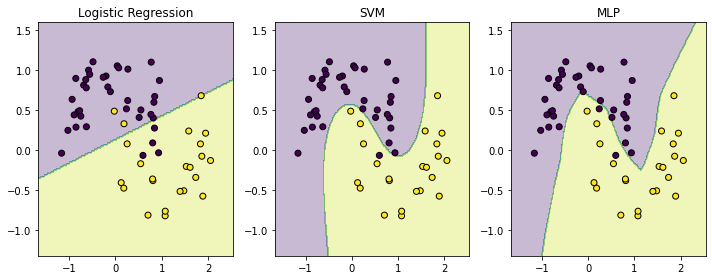

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
np.random.seed(42)
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# SVM Model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# MLP Classifier Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=5000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_clf.predict(X_test_scaled)

# Compute accuracy
acc_log = accuracy_score(y_test, y_pred_log)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

print(f'Logistic Regression Accuracy: {acc_log:.2f}')
print(f'SVM Accuracy: {acc_svm:.2f}')
print(f'MLP Accuracy: {acc_mlp:.2f}')

# Plot decision boundaries
plt.figure(figsize=(10, 4))
def plot_decision_boundary(model, X, y, title, subplot, scaler=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Buat grid data
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Jika scaler diberikan, transformasikan grid_points terlebih dahulu
    if scaler is not None:
        grid_points = scaler.transform(grid_points)
    
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 3, subplot)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

plot_decision_boundary(log_reg, X_test, y_test, 'Logistic Regression', 1)
plot_decision_boundary(svm_model, X_test, y_test, 'SVM', 2)
plot_decision_boundary(mlp_clf, X_test, y_test, 'MLP', 3, scaler=scaler)

plt.tight_layout()
plt.show()
